In [21]:
!pip install U classiq

import classiq

# **Design the quantum walk operator for the case of a line with 16 nodes.**





## **Discrete time Quantum Walk:**

Quantum  Walk is an approach used for designing quantum algorithms. It is analog of a classical random walk and is divided into discrete and continues cases.
 In this tuorial we focuse on discrite quantum walks and we study the example of a line of 16 nodes numbered from 0 to 15. The algorithm is divided into two steps:


1.   Determine the probabilities of the walker's  moving to each possible position.
 by flipping the quantum coin operator.  moving to each possible position.


2.  Execute the actual movement of the walker according to the established probabilities.






## Process




*  We will first install and import Classiq, and then obtain authentication.



In [22]:

classiq.authenticate()


In [23]:
from classiq import *
from classiq.qmod.symbolic import logical_or
from classiq.execution import ExecutionPreferences



*   To represent the 16 nodes, we require 4 qubits, as $ 16 = 2^4$.


In [25]:
num_qubits = 4
num_vertices = 2**num_qubits

##***Step one***



*  Implement the Coin operator C:


In [26]:
@qfunc
def prepare_minus(x: QBit):
    X(x)
    H(x)

In [27]:
@qfunc
def diffuzer_oracle(aux: Output[QNum],x:QNum):
    aux^=(x!=0)

In [28]:
@qfunc
def zero_diffuzer(x: QNum):
    aux = QNum('aux')
    allocate(1,aux)
    within_apply(compute=lambda: prepare_minus(aux),action=lambda: diffuzer_oracle)

def C_iteration(i:int,vertices: QNum, adjacent_vertices:QNum):
    prob = [0]*num_vertices
    if i == 0:
        prob[i + 1] = 1.0
    elif i == num_vertices - 1:
        prob[i - 1] = 1.0
    else:
        prob[i - 1] = 0.5
        prob[i + 1] = 0.5
    print(f'Node={i}, prob vec ={prob}')
    control(ctrl=vertices==i,
            operand=lambda: within_apply(
              compute= lambda: inplace_prepare_state(probabilities=prob, bound=0.01, target=adjacent_vertices),
              action= lambda: zero_diffuzer(adjacent_vertices)))

In [29]:
@qfunc
def C_operator(vertices:QNum, adjacent_vertices: QNum):
    for i in range(num_vertices):
        C_iteration(i,vertices,adjacent_vertices)


## **Step two**




*  Implement the shift operator S:



In [30]:
@qfunc
def edge_oracle(storethecheck:Output[QBit], vertices: QNum, adjacent_vertices: QNum):

    storethecheck |= (((vertices - adjacent_vertices) == 1) | ((vertices - adjacent_vertices) == -1))

@qfunc
def bitwise_swap(x: QArray[QBit], y:QArray[QBit]):

    repeat(count= x.len,
           iteration= lambda i: SWAP(x[i],y[i]))
@qfunc
def S_operator(vertices:QNum, adjacent_vertices: QNum):

    storethecheck = QNum('storethecheck')
    edge_oracle(storethecheck,vertices,adjacent_vertices)
    control(ctrl= storethecheck==1,
        operand= lambda: bitwise_swap(vertices,adjacent_vertices))

In [31]:
@qfunc
def main(vertices:Output[QNum], adjacent_vertices:Output[QNum]):
    allocate(num_qubits, vertices)
    hadamard_transform(vertices)
    allocate(num_qubits, adjacent_vertices)

    C_operator(vertices, adjacent_vertices)
    S_operator(vertices, adjacent_vertices)

qmod = create_model(main)
qprog = synthesize(qmod)
show(qprog)


Node=0, prob vec =[0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Node=1, prob vec =[0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Node=2, prob vec =[0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Node=3, prob vec =[0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Node=4, prob vec =[0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Node=5, prob vec =[0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Node=6, prob vec =[0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0]
Node=7, prob vec =[0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0]
Node=8, prob vec =[0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0]
Node=9, prob vec =[0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0]
Node=10, prob vec =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0]
Node=11, prob vec =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0]
Node=12, prob vec =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0]
Node=13, prob vec =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0]
Node

<ipython-input-28-1230702d74cb>:17: DeprecationWarning: Parameter 'operand' of function 'control' has been renamed to 'stmt_block'. Parameter 'operand' will be deprecated in a future release.
Hint: Change `control(ctrl=..., operand=...)` to `control(ctrl=..., stmt_block=...)` or `control(..., ...)`.
  control(ctrl=vertices==i,
<ipython-input-28-1230702d74cb>:18: DeprecationWarning: Parameters 'compute' and 'action' of function 'within_apply' have been renamed to 'within' and 'apply' respectively. Parameters 'compute' and 'action' will be deprecated in a future release.
Hint: Change `within_apply(compute=..., action=...)` to `within_apply(within=..., apply=...)` or `within_apply(..., ...)`.
  operand=lambda: within_apply(
<ipython-input-28-1230702d74cb>:5: DeprecationWarning: Parameters 'compute' and 'action' of function 'within_apply' have been renamed to 'within' and 'apply' respectively. Parameters 'compute' and 'action' will be deprecated in a future release.
Hint: Change `within_ap

Opening: https://platform.classiq.io/circuit/8d0cf0a3-8569-4831-aa09-9d6873a373de?version=0.45.1


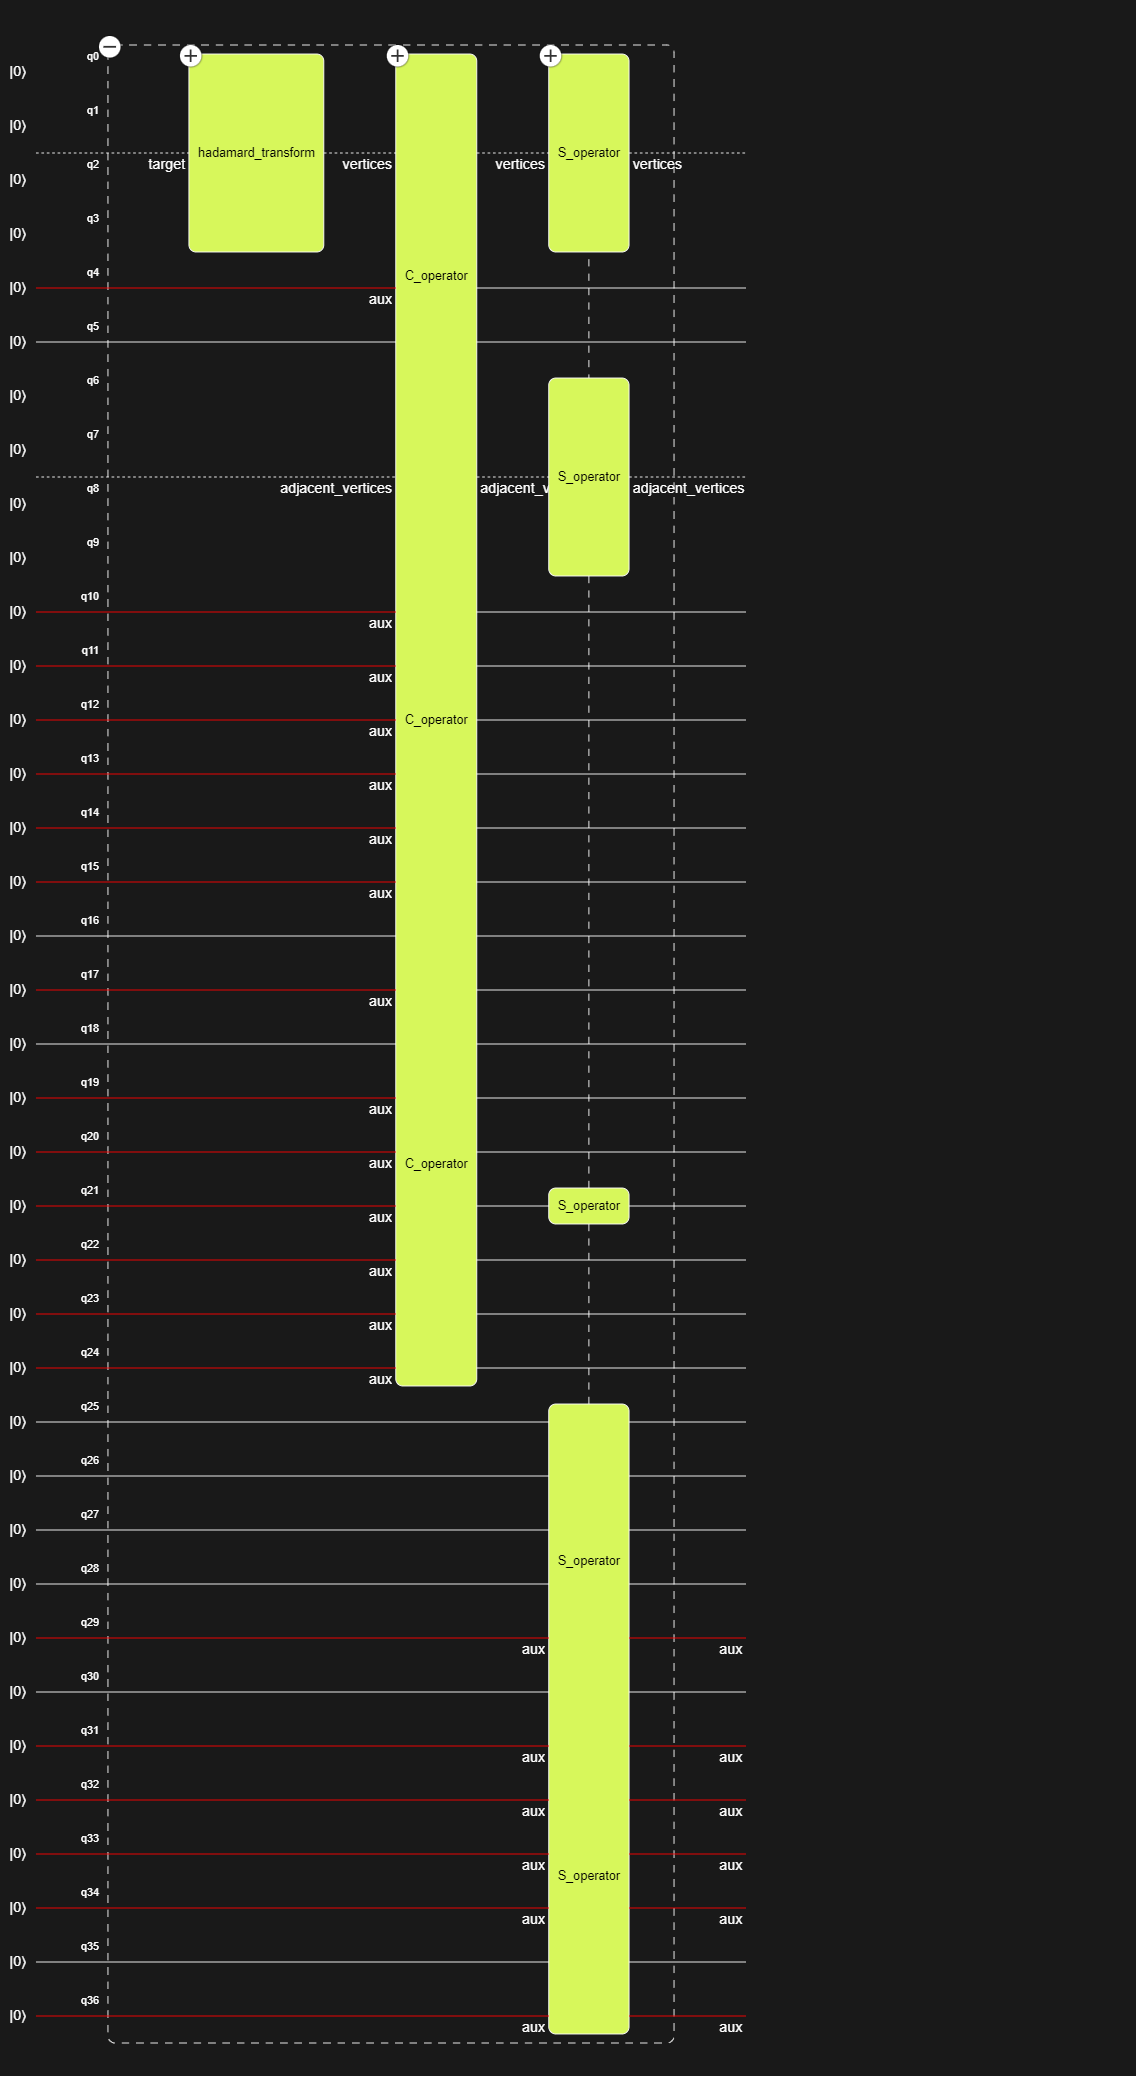